# Exploratory Data Analysis on an NC farm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df1 =  pd.read_csv(r'C:\Users\riesn\Documents\Regen Ag Projects\NC.csv')
df2 =  pd.read_csv(r'C:\Users\riesn\Documents\Regen Ag Projects\NC.csv')

# PART 1: DATA CLEANING

First I will spend time learning about the data

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 69 columns):
REPORT#                           641 non-null object
GROWER                            641 non-null object
ADDRESS                           641 non-null object
ADDRESS 2                         0 non-null float64
CITY                              641 non-null object
STATE                             641 non-null object
ZIP                               641 non-null int64
FARM                              641 non-null object
LAYERID                           0 non-null float64
COUNTY                            641 non-null object
SAMPLE ID                         641 non-null int64
LAST CROP                         0 non-null float64
LIME MONTH                        641 non-null int64
LIME YEAR                         641 non-null int64
LIME IN TONNES                    641 non-null int64
SOIL CLASS                        641 non-null object
HMA RESULT                        641 n

Field info on DF1:
- Soil Class: MIN: Mineral soil. Low percentage of humic matter. Target pH 6.0
- HM percent: Humic matter percent is a measure of the chemically active fraction of organic matter. The humic matter values are usually much lower than the actual organic matter content.
- W/V: The soil weight/volume is shown in grams/cubic centimeter and is used to determine the soil class. Soils high in sand have high W/V, while soils high in organic matter have low W/V. Loamy and clayey soils are intermediate.
- CEC: Cation exchange capacity is a measure of the soil's capacity to hold basic cations such as potassium, calcium, and magnesium, plus the acidic cations hydrogen and aluminum. CEC increases as soil organic matter, pH, and clay content increase. This calculation is given in milliequivalents per 100 grams of soil. Cations are positively charged ions such as calcium (Ca++), magnesium (Mg++), and potassium (K+). The larger the CEC value, the more cations the soil is able to hold against leaching.
- BS%: Base saturation percent is the percent of the CEC that is occupied by the basic cations [potassium (K), calcium (Ca), and magnesium (Mg)]. BS% indicates the pH and lime status of the soil. As pH increases, BS% also increases. On soils that are properly limed, BS% should range from 70 to 90. On acidic soils, BS% ranges from 50 to 60.
- Ac: Exchangeable acidity is the portion of the CEC that is occupied by acidic cations [Aluminum (Al), hydrogen (H)]. The amount of acidity decreases as soil pH increases.

- pH: Soil pH is a measure of the active acidity [hydrogen (H)] in the soil solution.

- P-1 and K-1: Phosphorus (P) and potassium (K) are shown as indexes used to evaluate nutrient availability to plants. Fertilizer recommendations for P and K decrease as the index increases. An index of 25 or lower is considered too low for optimum plant growth. A range of 26 to 50 is medium, and an index of greater than 50 is high. Adding more phosphorus when the index is greater than 50 should not generate a response. Fertilizer rates are given as pounds of P2O5 and K20 per acre or per 1,000 square feet.

- Ca and Mg%: Both calcium (Ca) and magnesium (Mg) are shown as percentages of CEC. Soil calcium is seldom low enough to limit plant growth. In general, calcium is the most common cation in the soil. Calcium percentage is essential for calculating CEC and to evaluate the relationship between calcium, magnesium, and potash (K). If the magnesium percent is low, magnesium will be recommended in the form of dolomitic lime or of a fertilizer containing magnesium.

- S (sulfur), Mn (manganese), Zn (zinc), Cu (copper): An index is determined for each of these nutrients. An index of 25 or lower is considered too low for optimum plant growth. A range of 26 to 50 is medium, and a range of greater than 50 is high. Adding more nutrients should not generate a response when the index is greater than 50. Sulfur is difficult to interpret since, like nitrogen, it leaches readily from sandy soils.

- Na is sodium (https://ucanr.edu/blogs/blogcore/postdetail.cfm?postnum=12766)


- Fields with 100% null values or all = 0 values: Address2, LayerID, Last Crop, LIME MONTH, LIME YEAR, LIME IN TONES,Mn Avail Crop2,SS Result (soluble salts), NN Result (Net Nitrification?), AM Result (?), comment crop 1, all crop 2 fields

NIT CROP1- Nitrogen recommendation

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 18 columns):
Field Name:       69 non-null object
Year              69 non-null float64
Month             69 non-null object
Date              69 non-null object
Count             69 non-null float64
pH                66 non-null float64
Ac (meq/100g)     66 non-null float64
CEC (meq/100g)    66 non-null float64
P                 66 non-null float64
K                 66 non-null float64
S                 65 non-null float64
Zn                66 non-null float64
Mn                66 non-null float64
Cu (%)            66 non-null float64
Mg%               65 non-null float64
Ca%               65 non-null float64
Unnamed: 16       0 non-null float64
Unnamed: 17       0 non-null float64
dtypes: float64(15), object(3)
memory usage: 10.1+ KB


Field Info on DF2:

- Cation exchange capacity is a measure of the soil's capacity to hold basic cations such as potassium, calcium, and magnesium, plus the acidic cations hydrogen and aluminum. CEC increases as soil organic matter, pH, and clay content increase. This calculation is given in milliequivalents per 100 grams of soil. Cations are positively charged ions such as calcium (Ca++), magnesium (Mg++), and potassium (K+). The larger the CEC value, the more cations the soil is able to hold against leaching.

- Ac: Exchangeable acidity is the portion of the CEC that is occupied by acidic cations [Aluminum (Al), hydrogen (H)]. The amount of acidity decreases as soil pH increases.

Will drop the 100% empty columns. ask about columns with 0 instead?

In [5]:
#Dropping bottom 2 rows and last 2 columns as all nulls
df2.drop(df2.columns[len(df2.columns)-1], axis=1, inplace=True)
df2.drop(df2.columns[len(df2.columns)-1], axis=1, inplace=True)
df2.drop(df2.tail(2).index,inplace=True) # drop last n rows
df2=df2.reset_index(drop=True)

In [6]:
farm_info_col=['GROWER','ADDRESS','ADDRESS 2','CITY','STATE','ZIP','COUNTY']

In [7]:
#Dropping the columns relative to the farm itself (address name etc...)
for col in farm_info_col:
    df1.drop(col, axis = 1, inplace=True)

In [8]:
df1=df1.reset_index(drop=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
Field Name:       69 non-null object
Year              69 non-null float64
Month             69 non-null object
Date              69 non-null object
Count             69 non-null float64
pH                66 non-null float64
Ac (meq/100g)     66 non-null float64
CEC (meq/100g)    66 non-null float64
P                 66 non-null float64
K                 66 non-null float64
S                 65 non-null float64
Zn                66 non-null float64
Mn                66 non-null float64
Cu (%)            66 non-null float64
Mg%               65 non-null float64
Ca%               65 non-null float64
dtypes: float64(13), object(3)
memory usage: 8.8+ KB


In [10]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df1.head()

,REPORT#,FARM,LAYERID,SAMPLE ID,LAST CROP,LIME MONTH,LIME YEAR,LIME IN TONNES,SOIL CLASS,HMA RESULT,VW RESULT,CATION EXCHANGE,BASE SAT.,AC,pH,P,K,Ca,Mg,Mn,Mn Avail Crop1,Mn Avail Crop2,Zn,Zn Avail,Cu,S,SS Result,NN Result,AM Result,Na,Crop 1,LIME CROP1,NIT CROP1,PHO CROP1,POT CROP1,Mg CROP1,S CROP1,Cu CROP1,Zn CROP1,B CROP1,Mn CROP1,Comment Crop1,Note CROP1,Crop 2,LIME CROP2,NIT CROP2,PHO CROP2,POT CROP2,Mg CROP2,Cu CROP2,Zn CROP2,B CROP2,Mn CROP2,Comment Crop2,Note CROP2,Rpt CoverType (Rpt Soil Notes),Narrative,Copy1,Copy2,Copy3,Copy4,Complete Date
0,SL013502,C,NaN,2601,NaN,0,0,0,MIN,0.76,1.05,8.4,93,0.6,6.3,90,88,74,13,95,62,NaN,74,74,57,59,NaN,NaN,NaN,0.2,Cotton,0.0,50-70,0,0,0,0,0,0,1,0,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terri Thomas,NaN,NaN,NaN,11/28/2018
1,SL013502,C,NaN,2602,NaN,0,0,0,MIN,0.51,1.04,8.3,95,0.4,6.5,66,79,76,14,126,78,NaN,56,56,42,56,NaN,NaN,NaN,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terri Thomas,NaN,NaN,NaN,11/28/2018
2,SL013502,C,NaN,2603,NaN,0,0,0,MIN,0.56,1.05,7.6,91,0.7,6.2,75,75,72,14,132,86,NaN,60,60,52,54,NaN,NaN,NaN,0.2,Cotton,0.0,50-70,0,20,0,0,0,0,1,0,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terri Thomas,NaN,NaN,NaN,11/28/2018
3,SL013502,C,NaN,2604,NaN,0,0,0,MIN,0.56,1.07,8.1,93,0.6,6.4,84,83,73,14,160,101,NaN,50,50,47,59,NaN,NaN,NaN,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terri Thomas,NaN,NaN,NaN,11/28/2018
4,SL013502,C,NaN,2605,NaN,0,0,0,MIN,0.97,1.09,9.2,96,0.4,6.6,100,82,77,14,109,66,NaN,40,40,41,62,NaN,NaN,NaN,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,pH$,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terri Thomas,NaN,NaN,NaN,11/28/2018


In [11]:
def eda(dataframe):
    print('MISSING VALUES % of total \n', dataframe.isnull().sum()*100/dataframe.isnull().count())
    print('\n 0 Values \n', dataframe.isin([0]).sum())
    print('\n DATA TYPES \n', dataframe.dtypes)
    print('\n DATA SHAPE \n', dataframe.shape)
    print('\n DATA DESCRIBE \n', dataframe.describe())
    for item in dataframe:
        print('\n UNIQUE VALUE TOTALS \n',item)
        print(dataframe[item].nunique())
        print(dataframe[item].value_counts())     
eda(df1)


MISSING VALUES % of total 
 REPORT#                             0.000000
FARM                                0.000000
LAYERID                           100.000000
SAMPLE ID                           0.000000
LAST CROP                         100.000000
LIME MONTH                          0.000000
LIME YEAR                           0.000000
LIME IN TONNES                      0.000000
SOIL CLASS                          0.000000
HMA RESULT                          0.000000
VW RESULT                           0.000000
CATION EXCHANGE                     0.000000
BASE SAT.                           0.000000
AC                                  0.000000
pH                                  0.000000
P                                   0.000000
K                                   0.000000
Ca                                  0.000000
Mg                                  0.000000
Mn                                  0.000000
Mn Avail Crop1                      0.000000
Mn Avail Crop2             

1
MIN    641
Name: SOIL CLASS, dtype: int64

 UNIQUE VALUE TOTALS 
 HMA RESULT
35
0.41    57
0.51    53
0.46    51
0.56    45
0.60    44
0.71    38
0.66    35
0.36    32
0.76    28
0.32    27
0.92    25
0.97    22
1.08    20
1.02    18
0.86    15
1.31    15
1.25    14
0.81    14
0.27    12
1.19    12
1.14    10
1.43     9
1.49     7
0.22     6
1.37     6
1.61     5
1.55     4
1.67     4
0.18     3
1.80     3
1.94     2
1.74     2
1.87     1
2.15     1
2.01     1
Name: HMA RESULT, dtype: int64

 UNIQUE VALUE TOTALS 
 VW RESULT
45
1.12    53
1.07    44
1.10    43
1.09    40
1.13    38
1.11    36
1.05    36
1.14    35
1.17    33
1.08    31
1.15    30
1.06    27
1.16    23
1.19    22
1.03    21
1.18    20
1.04    20
1.01    14
1.20    11
1.02    10
1.00     7
1.21     6
0.99     4
1.26     3
0.97     3
0.95     3
1.25     3
0.93     3
1.22     2
0.85     2
0.98     2
1.27     2
1.28     2
0.86     1
0.87     1
0.90     1
0.92     1
1.23     1
0.94     1
0.89     1
1.24     1
0.82     1
0.9

In [12]:
eda(df2)

MISSING VALUES % of total 
 Field Name:       0.000000
Year              0.000000
Month             0.000000
Date              0.000000
Count             0.000000
pH                4.347826
Ac (meq/100g)     4.347826
CEC (meq/100g)    4.347826
P                 4.347826
K                 4.347826
S                 5.797101
Zn                4.347826
Mn                4.347826
Cu (%)            4.347826
Mg%               5.797101
Ca%               5.797101
dtype: float64

 0 Values 
 Field Name:       0
Year              0
Month             0
Date              0
Count             0
pH                0
Ac (meq/100g)     0
CEC (meq/100g)    0
P                 0
K                 0
S                 0
Zn                0
Mn                0
Cu (%)            0
Mg%               0
Ca%               0
dtype: int64

 DATA TYPES 
 Field Name:        object
Year              float64
Month              object
Date               object
Count             float64
pH                float64
Ac (meq/

In [13]:
col_names_df1 = df1.columns.to_list()

# empty out original list with original column names
contains_null_df1 = []

# iterate through the columns
for col in col_names_df1:
    # print the the columns with NULL values
    if df1[col].isnull().sum() > 0:
        contains_null_df1.append(col)


In [14]:
#dropping remaining empty columns
for col in contains_null_df1:
    df1.drop(col, axis = 1, inplace=True)

In [15]:
df1=df1.reset_index(drop=True)

In [16]:
df1.head()

,REPORT#,FARM,SAMPLE ID,LIME MONTH,LIME YEAR,LIME IN TONNES,SOIL CLASS,HMA RESULT,VW RESULT,CATION EXCHANGE,BASE SAT.,AC,pH,P,K,Ca,Mg,Mn,Mn Avail Crop1,Zn,Zn Avail,Cu,S,Na,Crop 1,LIME CROP1,NIT CROP1,PHO CROP1,POT CROP1,Mg CROP1,S CROP1,Cu CROP1,Zn CROP1,B CROP1,Mn CROP1,Note CROP1,Copy1,Complete Date
0,SL013502,C,2601,0,0,0,MIN,0.76,1.05,8.4,93,0.6,6.3,90,88,74,13,95,62,74,74,57,59,0.2,Cotton,0.0,50-70,0,0,0,0,0,0,1,0,3,Terri Thomas,11/28/2018
1,SL013502,C,2602,0,0,0,MIN,0.51,1.04,8.3,95,0.4,6.5,66,79,76,14,126,78,56,56,42,56,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,3,Terri Thomas,11/28/2018
2,SL013502,C,2603,0,0,0,MIN,0.56,1.05,7.6,91,0.7,6.2,75,75,72,14,132,86,60,60,52,54,0.2,Cotton,0.0,50-70,0,20,0,0,0,0,1,0,3,Terri Thomas,11/28/2018
3,SL013502,C,2604,0,0,0,MIN,0.56,1.07,8.1,93,0.6,6.4,84,83,73,14,160,101,50,50,47,59,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,3,Terri Thomas,11/28/2018
4,SL013502,C,2605,0,0,0,MIN,0.97,1.09,9.2,96,0.4,6.6,100,82,77,14,109,66,40,40,41,62,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,pH$,3,Terri Thomas,11/28/2018


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 38 columns):
REPORT#            641 non-null object
FARM               641 non-null object
SAMPLE ID          641 non-null int64
LIME MONTH         641 non-null int64
LIME YEAR          641 non-null int64
LIME IN TONNES     641 non-null int64
SOIL CLASS         641 non-null object
HMA RESULT         641 non-null float64
VW RESULT          641 non-null float64
CATION EXCHANGE    641 non-null float64
BASE SAT.          641 non-null int64
AC                 641 non-null float64
pH                 641 non-null float64
P                  641 non-null int64
K                  641 non-null int64
Ca                 641 non-null int64
Mg                 641 non-null int64
Mn                 641 non-null int64
Mn Avail Crop1     641 non-null int64
Zn                 641 non-null int64
Zn Avail           641 non-null int64
Cu                 641 non-null int64
S                  641 non-null int64
Na      

In [18]:
#adding a new column that is month/year based on the complete Date
import datetime
df1['month_year'] = pd.to_datetime(df1['Complete Date']).dt.to_period('M')
df1.head()


,REPORT#,FARM,SAMPLE ID,LIME MONTH,LIME YEAR,LIME IN TONNES,SOIL CLASS,HMA RESULT,VW RESULT,CATION EXCHANGE,BASE SAT.,AC,pH,P,K,Ca,Mg,Mn,Mn Avail Crop1,Zn,Zn Avail,Cu,S,Na,Crop 1,LIME CROP1,NIT CROP1,PHO CROP1,POT CROP1,Mg CROP1,S CROP1,Cu CROP1,Zn CROP1,B CROP1,Mn CROP1,Note CROP1,Copy1,Complete Date,month_year
0,SL013502,C,2601,0,0,0,MIN,0.76,1.05,8.4,93,0.6,6.3,90,88,74,13,95,62,74,74,57,59,0.2,Cotton,0.0,50-70,0,0,0,0,0,0,1,0,3,Terri Thomas,11/28/2018,2018-11
1,SL013502,C,2602,0,0,0,MIN,0.51,1.04,8.3,95,0.4,6.5,66,79,76,14,126,78,56,56,42,56,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,3,Terri Thomas,11/28/2018,2018-11
2,SL013502,C,2603,0,0,0,MIN,0.56,1.05,7.6,91,0.7,6.2,75,75,72,14,132,86,60,60,52,54,0.2,Cotton,0.0,50-70,0,20,0,0,0,0,1,0,3,Terri Thomas,11/28/2018,2018-11
3,SL013502,C,2604,0,0,0,MIN,0.56,1.07,8.1,93,0.6,6.4,84,83,73,14,160,101,50,50,47,59,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,0,3,Terri Thomas,11/28/2018,2018-11
4,SL013502,C,2605,0,0,0,MIN,0.97,1.09,9.2,96,0.4,6.6,100,82,77,14,109,66,40,40,41,62,0.2,Cotton,0.0,50-70,0,10,0,0,0,0,1,pH$,3,Terri Thomas,11/28/2018,2018-11


After an initial conversation with the farmer, these 4 variables were selected as being of most interest

In [19]:
pd.options.display.float_format = "{:,.2f}".format

df1[['CATION EXCHANGE','pH','P','K']].describe()

,CATION EXCHANGE,pH,P,K
count,641.00,641.00,641.00,641.00
mean,7.24,6.19,109.30,69.12
std,1.47,0.22,79.24,16.50
min,2.90,5.60,24.00,19.00
25%,6.30,6.00,62.00,60.00
50%,7.00,6.20,85.00,67.00
75%,8.10,6.30,121.00,78.00
max,13.30,6.90,717.00,181.00


In [20]:
col_names_df1 = df1.columns.to_list()

In [21]:
# removing lime month, lime year and lime in tones as those variables only have 0 as values
cont_var = ['HMA RESULT','VW RESULT','CATION EXCHANGE','BASE SAT.','AC','pH',
 'P',
 'K',
 'Ca',
 'Mg',
 'Mn',
 'Mn Avail Crop1',
 'Zn',
 #'Zn Avail', duplicate column remove
 'Cu',
 'S',
 'Na',
 'LIME CROP1',
 'PHO CROP1',
 'POT CROP1',
 'Mg CROP1',
 'S CROP1',
 'Cu CROP1',
 'Zn CROP1',
 #'B CROP1', hashing out because only one value
 #'Note CROP1'
           ]

In [22]:
cont_var_interest=['CATION EXCHANGE','pH',
 'P',
 'K',]

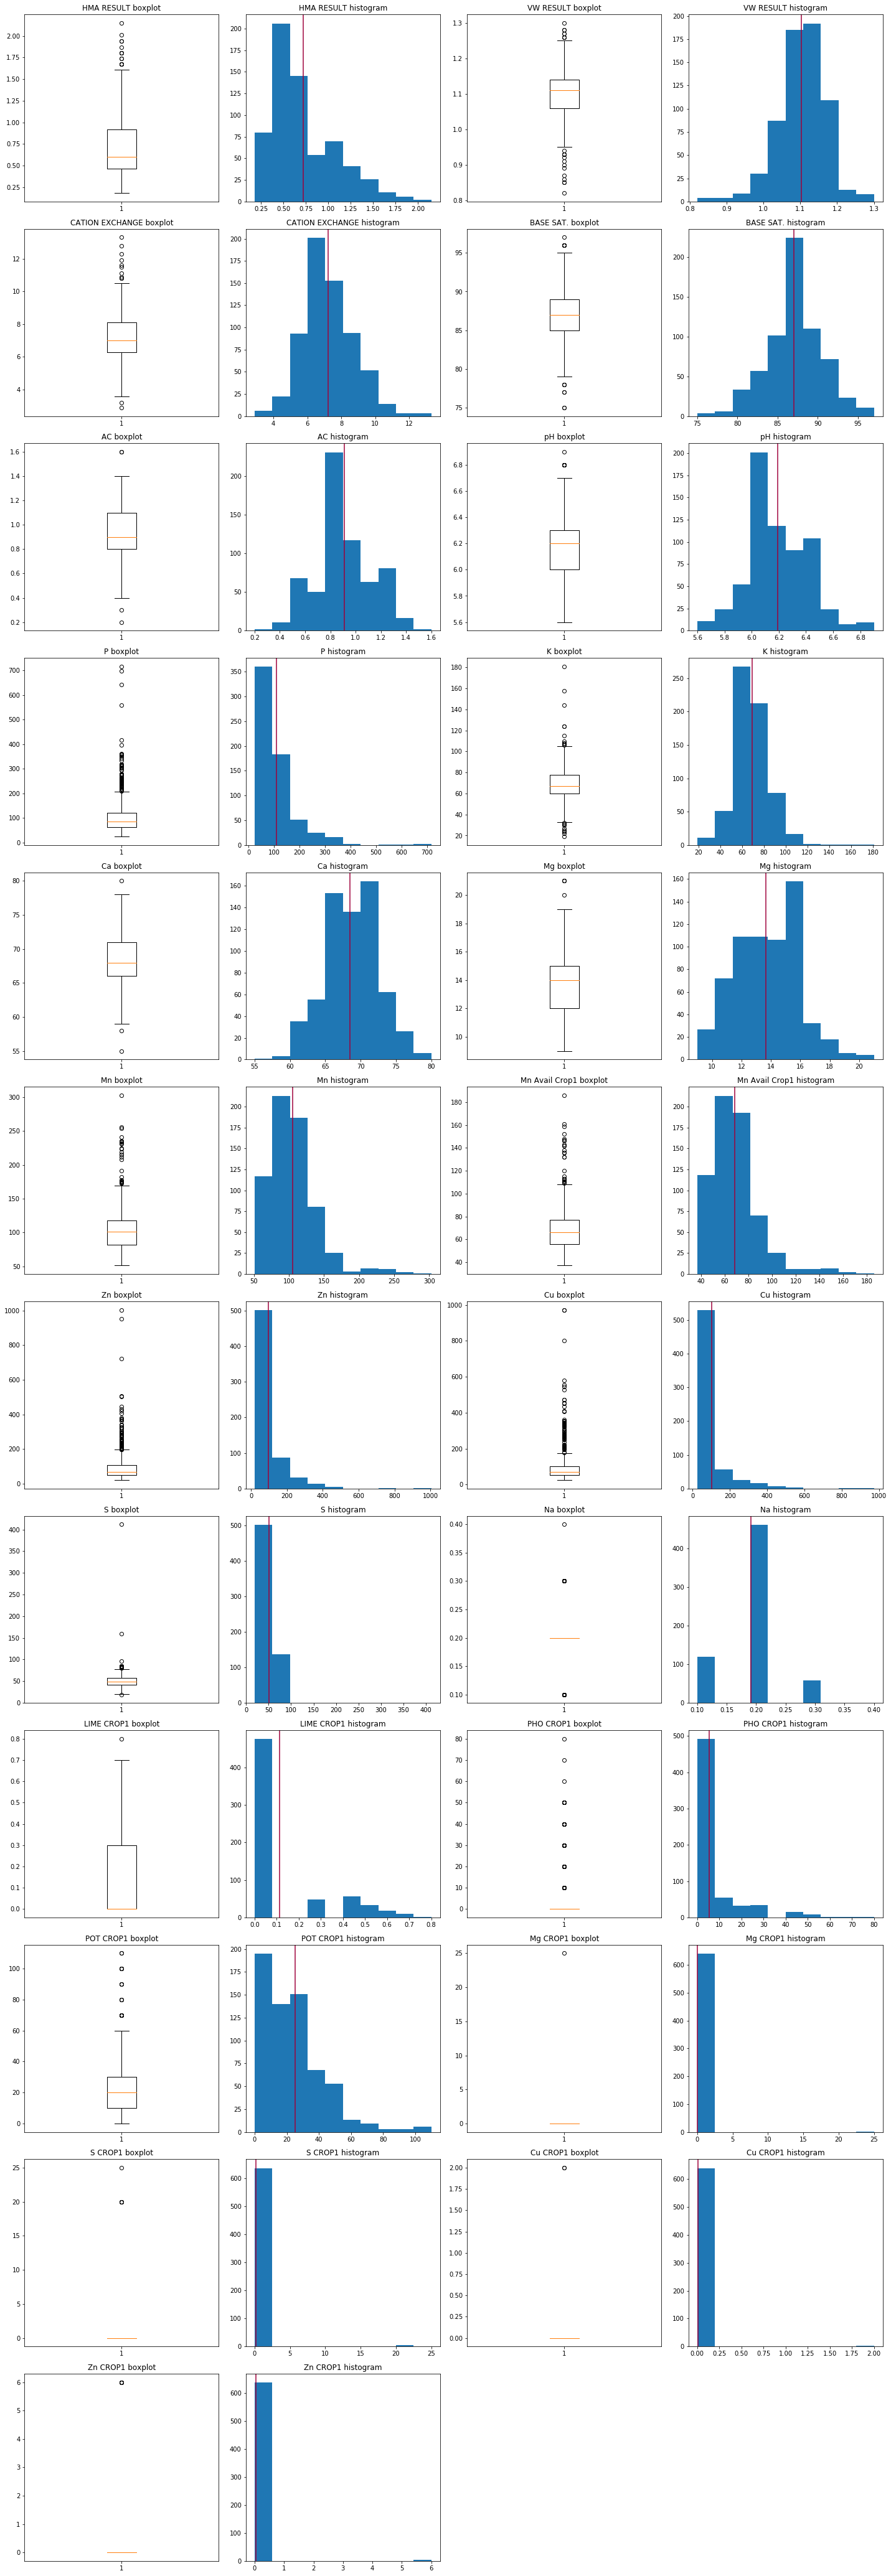

In [23]:
#Visually evaluating outliers for all variables
def outliers_visual(data):
    plt.figure(figsize=(20, 110))
    i = 0
    for col in cont_var:
        i += 1
        plt.subplot(len(cont_var), 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(len(cont_var), 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        plt.axvline(data.loc[:,col].mean(), color=('xkcd:cranberry')) #red line is the mean
    plt.tight_layout()    
    plt.show()
    
outliers_visual(df1)

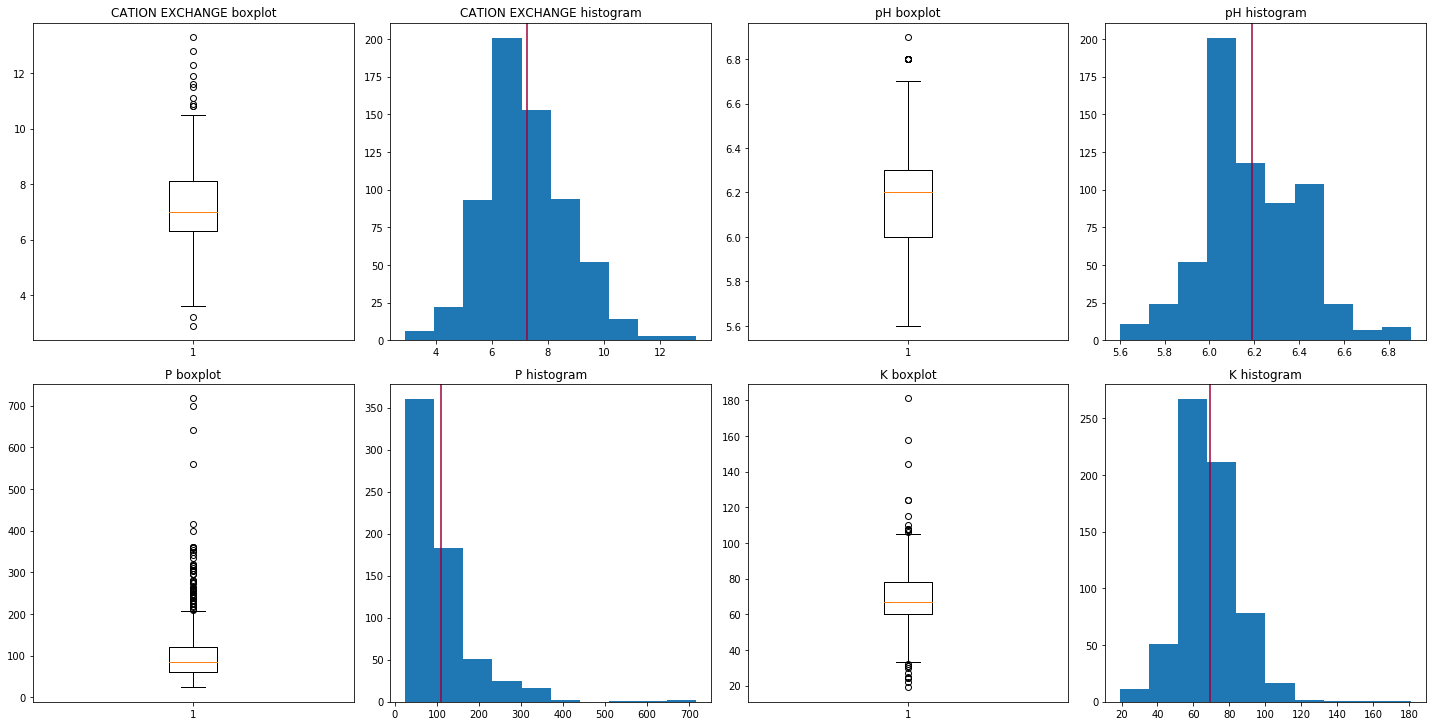

In [24]:
#Visually evaluating outliers for variables of interest
def outliers_visual(data):
    plt.figure(figsize=(20, 20))
    i = 0
    for col in cont_var_interest:
        i += 1
        plt.subplot(len(cont_var_interest), 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(len(cont_var_interest), 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        plt.axvline(data.loc[:,col].mean(), color=('xkcd:cranberry')) #red line is the mean
    plt.tight_layout()    
    plt.show()
    
outliers_visual(df1)

In [25]:
len(cont_var)

23

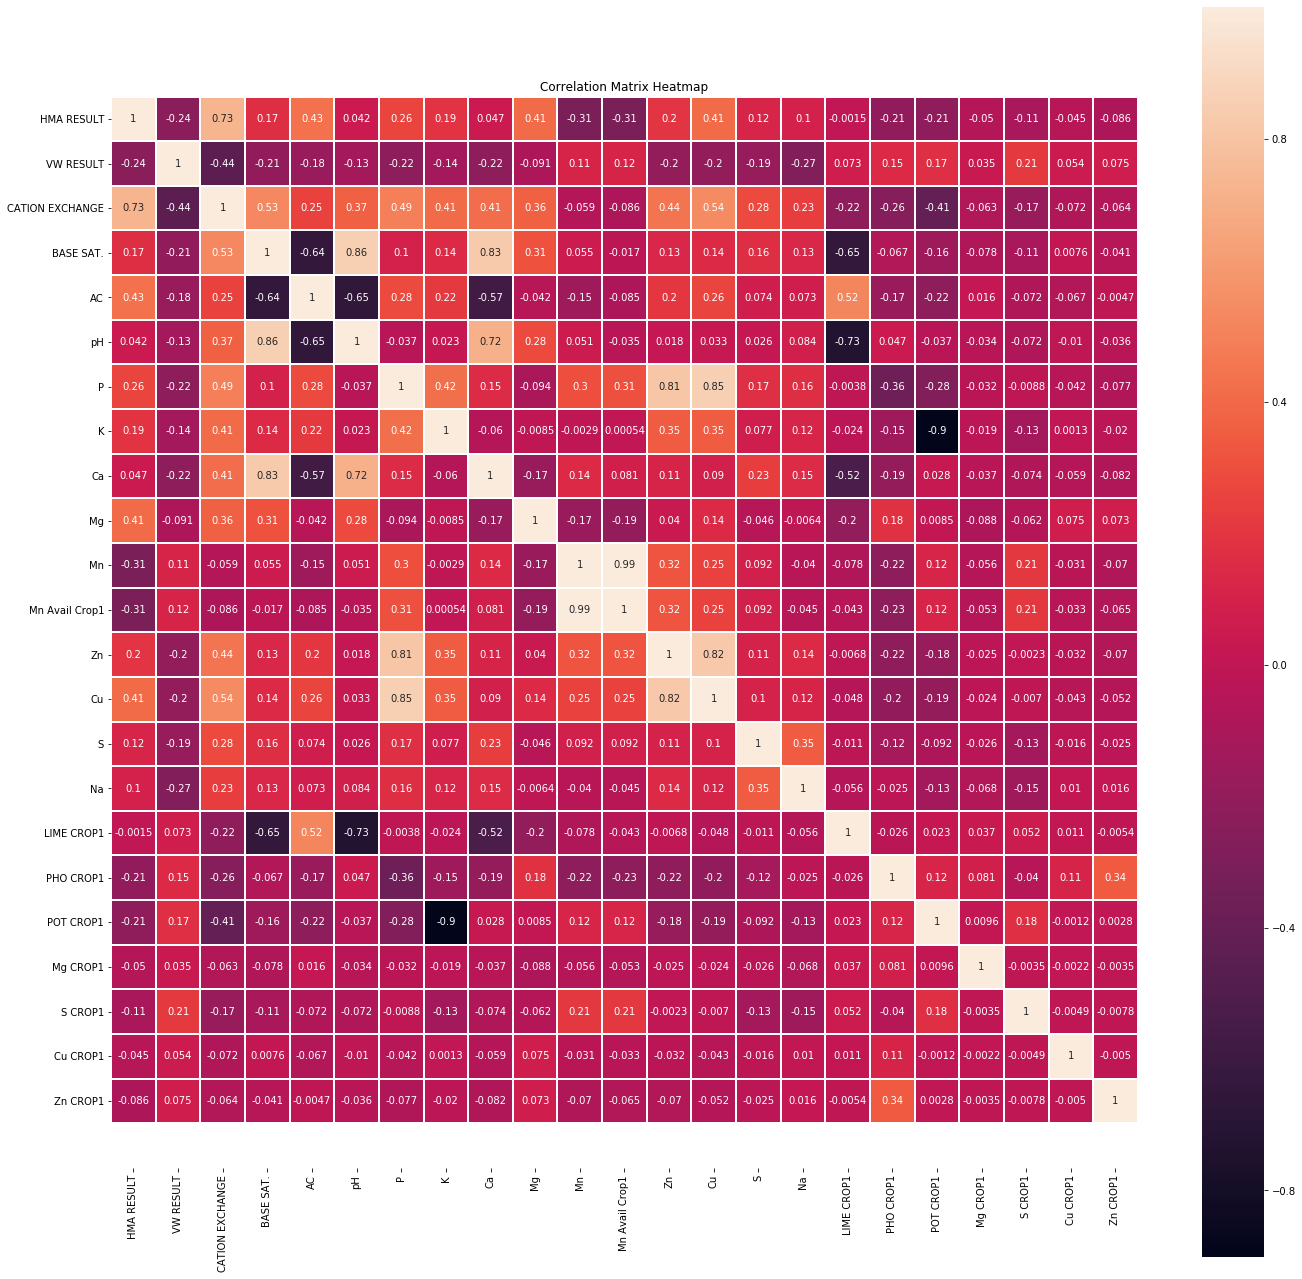

In [26]:
#Evaluating overall correlation between all variables
plt.figure(figsize=(23,23))
sns.heatmap(df1[cont_var].corr(), square=True, annot=True, linewidths=1)
plt.ylim(24, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

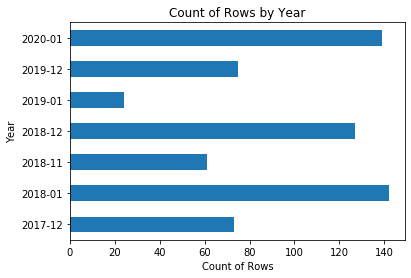

In [27]:
#understanding distribution by year
df1['month_year'].value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

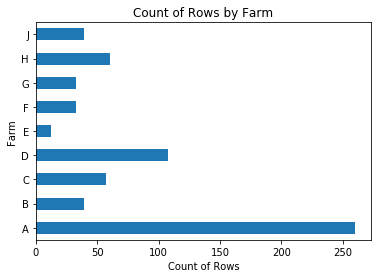

In [28]:
#understanding the distribution by farm
df1['FARM '].value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Farm')
plt.xlabel('Count of Rows')
plt.ylabel('Farm')
plt.show()

# Part 2: Looking at Farm A as it has the most data points. 

Will look at how variables changed over time

In [29]:
farm_A_df=df1.iloc[(df1['FARM '] == 'A').values]

In [30]:
farm_A_df.head()

,REPORT#,FARM,SAMPLE ID,LIME MONTH,LIME YEAR,LIME IN TONNES,SOIL CLASS,HMA RESULT,VW RESULT,CATION EXCHANGE,BASE SAT.,AC,pH,P,K,Ca,Mg,Mn,Mn Avail Crop1,Zn,Zn Avail,Cu,S,Na,Crop 1,LIME CROP1,NIT CROP1,PHO CROP1,POT CROP1,Mg CROP1,S CROP1,Cu CROP1,Zn CROP1,B CROP1,Mn CROP1,Note CROP1,Copy1,Complete Date,month_year
136,SL017056,A,101,0,0,0,MIN,0.46,1.15,5.90,88,0.70,6.10,106,67,68,14,134,87,160,160,97,52,0.10,Cotton,0.00,50-70,0,20,0,0,0,0,1,0,3,Terri Thomas,12/20/2018,2018-12
137,SL017056,A,102,0,0,0,MIN,0.56,1.11,7.20,91,0.60,6.30,106,54,72,15,136,87,159,159,115,66,0.20,Cotton,0.00,50-70,0,40,0,0,0,0,1,0,3,Terri Thomas,12/20/2018,2018-12
138,SL017056,A,103,0,0,0,MIN,0.46,1.12,5.60,87,0.70,6.00,106,43,69,14,110,73,114,114,86,66,0.20,Cotton,0.00,50-70,0,60,0,0,0,0,1,0,3,Terri Thomas,12/20/2018,2018-12
139,SL017056,A,201,0,0,0,MIN,0.51,1.11,8.40,90,0.90,6.20,305,66,74,12,159,102,328,328,97,75,0.20,Cotton,0.00,50-70,0,30,0,0,0,0,1,0,3,Terri Thomas,12/20/2018,2018-12
140,SL017056,A,202,0,0,0,MIN,0.51,1.04,6.20,86,0.80,5.90,112,48,70,13,112,74,81,81,56,85,0.30,Cotton,0.30,50-70,0,50,0,0,0,0,1,0,3,Terri Thomas,12/20/2018,2018-12


In [31]:
pd.options.display.float_format = "{:,.2f}".format

farm_A_df[['CATION EXCHANGE','pH','P','K']].describe()

,CATION EXCHANGE,pH,P,K
count,260.00,260.00,260.00,260.00
mean,7.54,6.16,155.04,72.27
std,1.45,0.19,82.73,15.10
min,4.90,5.70,40.00,33.00
25%,6.40,6.10,98.00,62.00
50%,7.20,6.20,127.00,70.00
75%,8.40,6.30,201.00,83.00
max,12.80,6.70,559.00,124.00


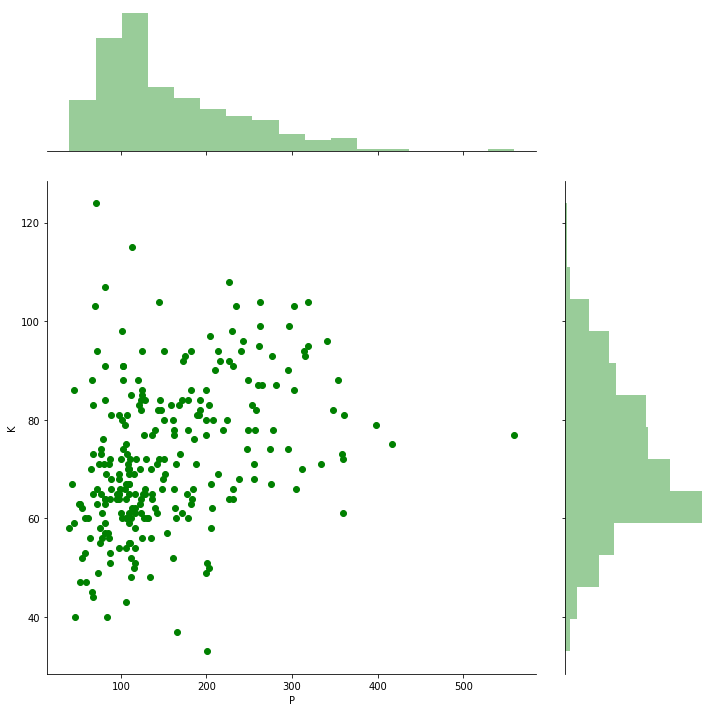

In [32]:
sns.jointplot(x='P', y='K',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

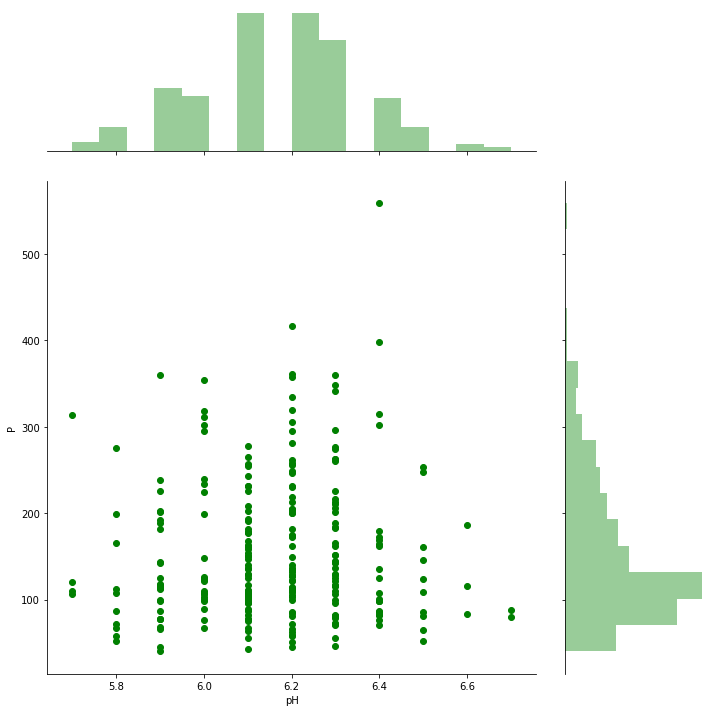

In [33]:
sns.jointplot(x='pH', y='P',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

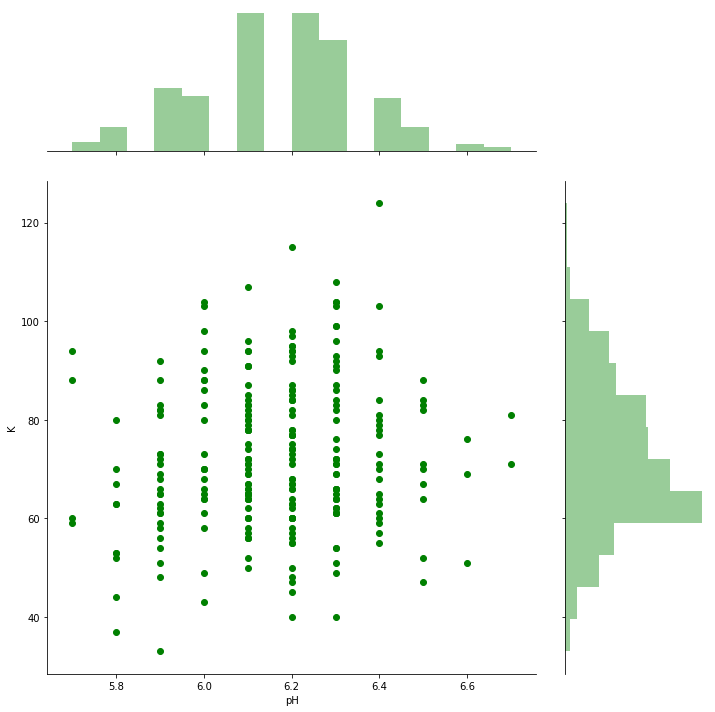

In [34]:
sns.jointplot(x='pH', y='K',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

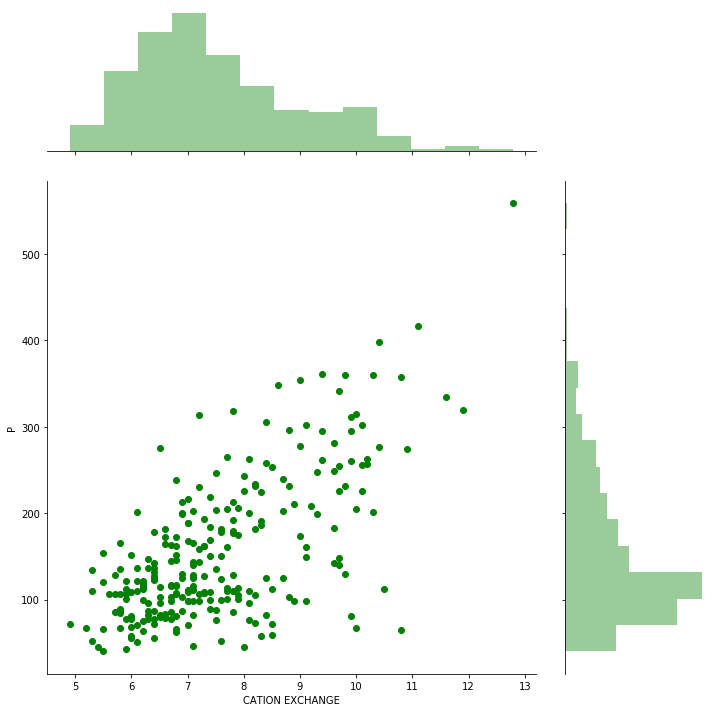

In [35]:
sns.jointplot(x='CATION EXCHANGE', y='P',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

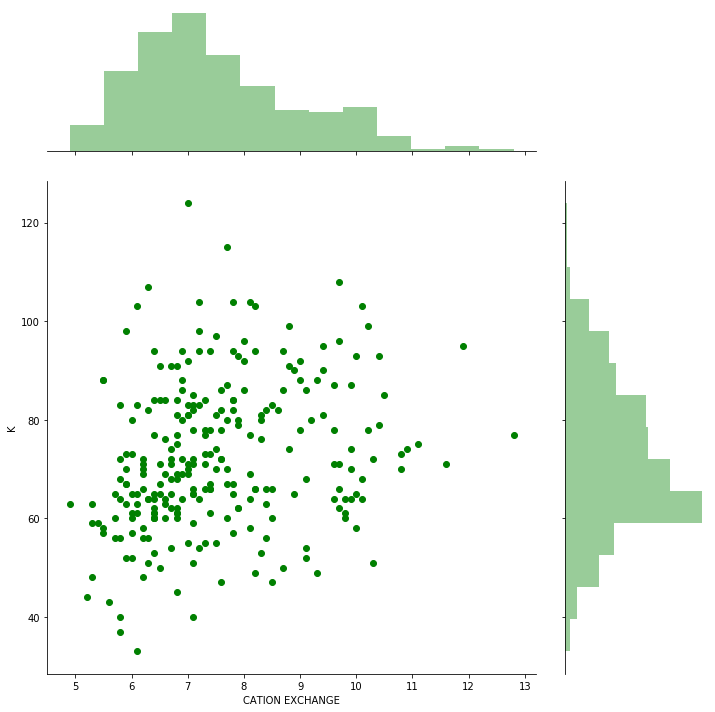

In [36]:
sns.jointplot(x='CATION EXCHANGE', y='K',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

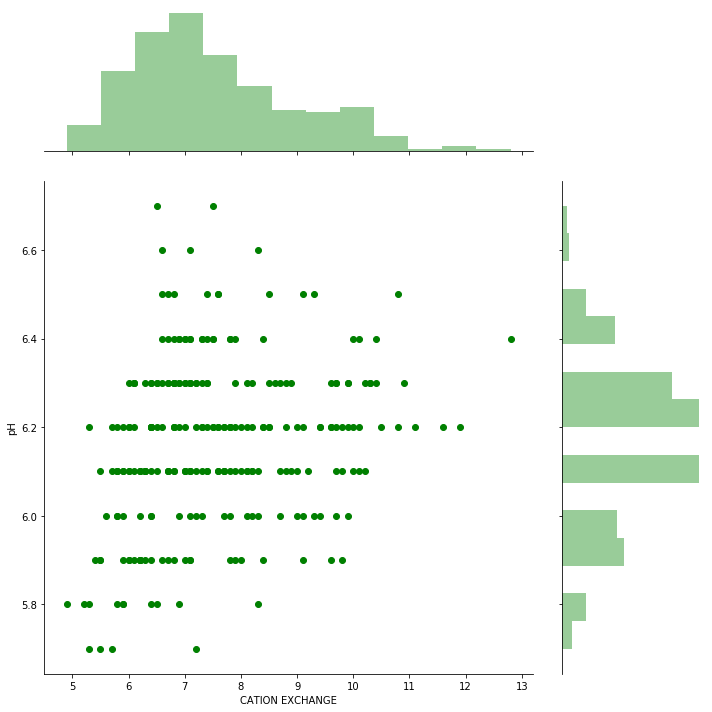

In [37]:
sns.jointplot(x='CATION EXCHANGE', y='pH',  data=farm_A_df, height=10, ratio=3, color="green")
plt.show()

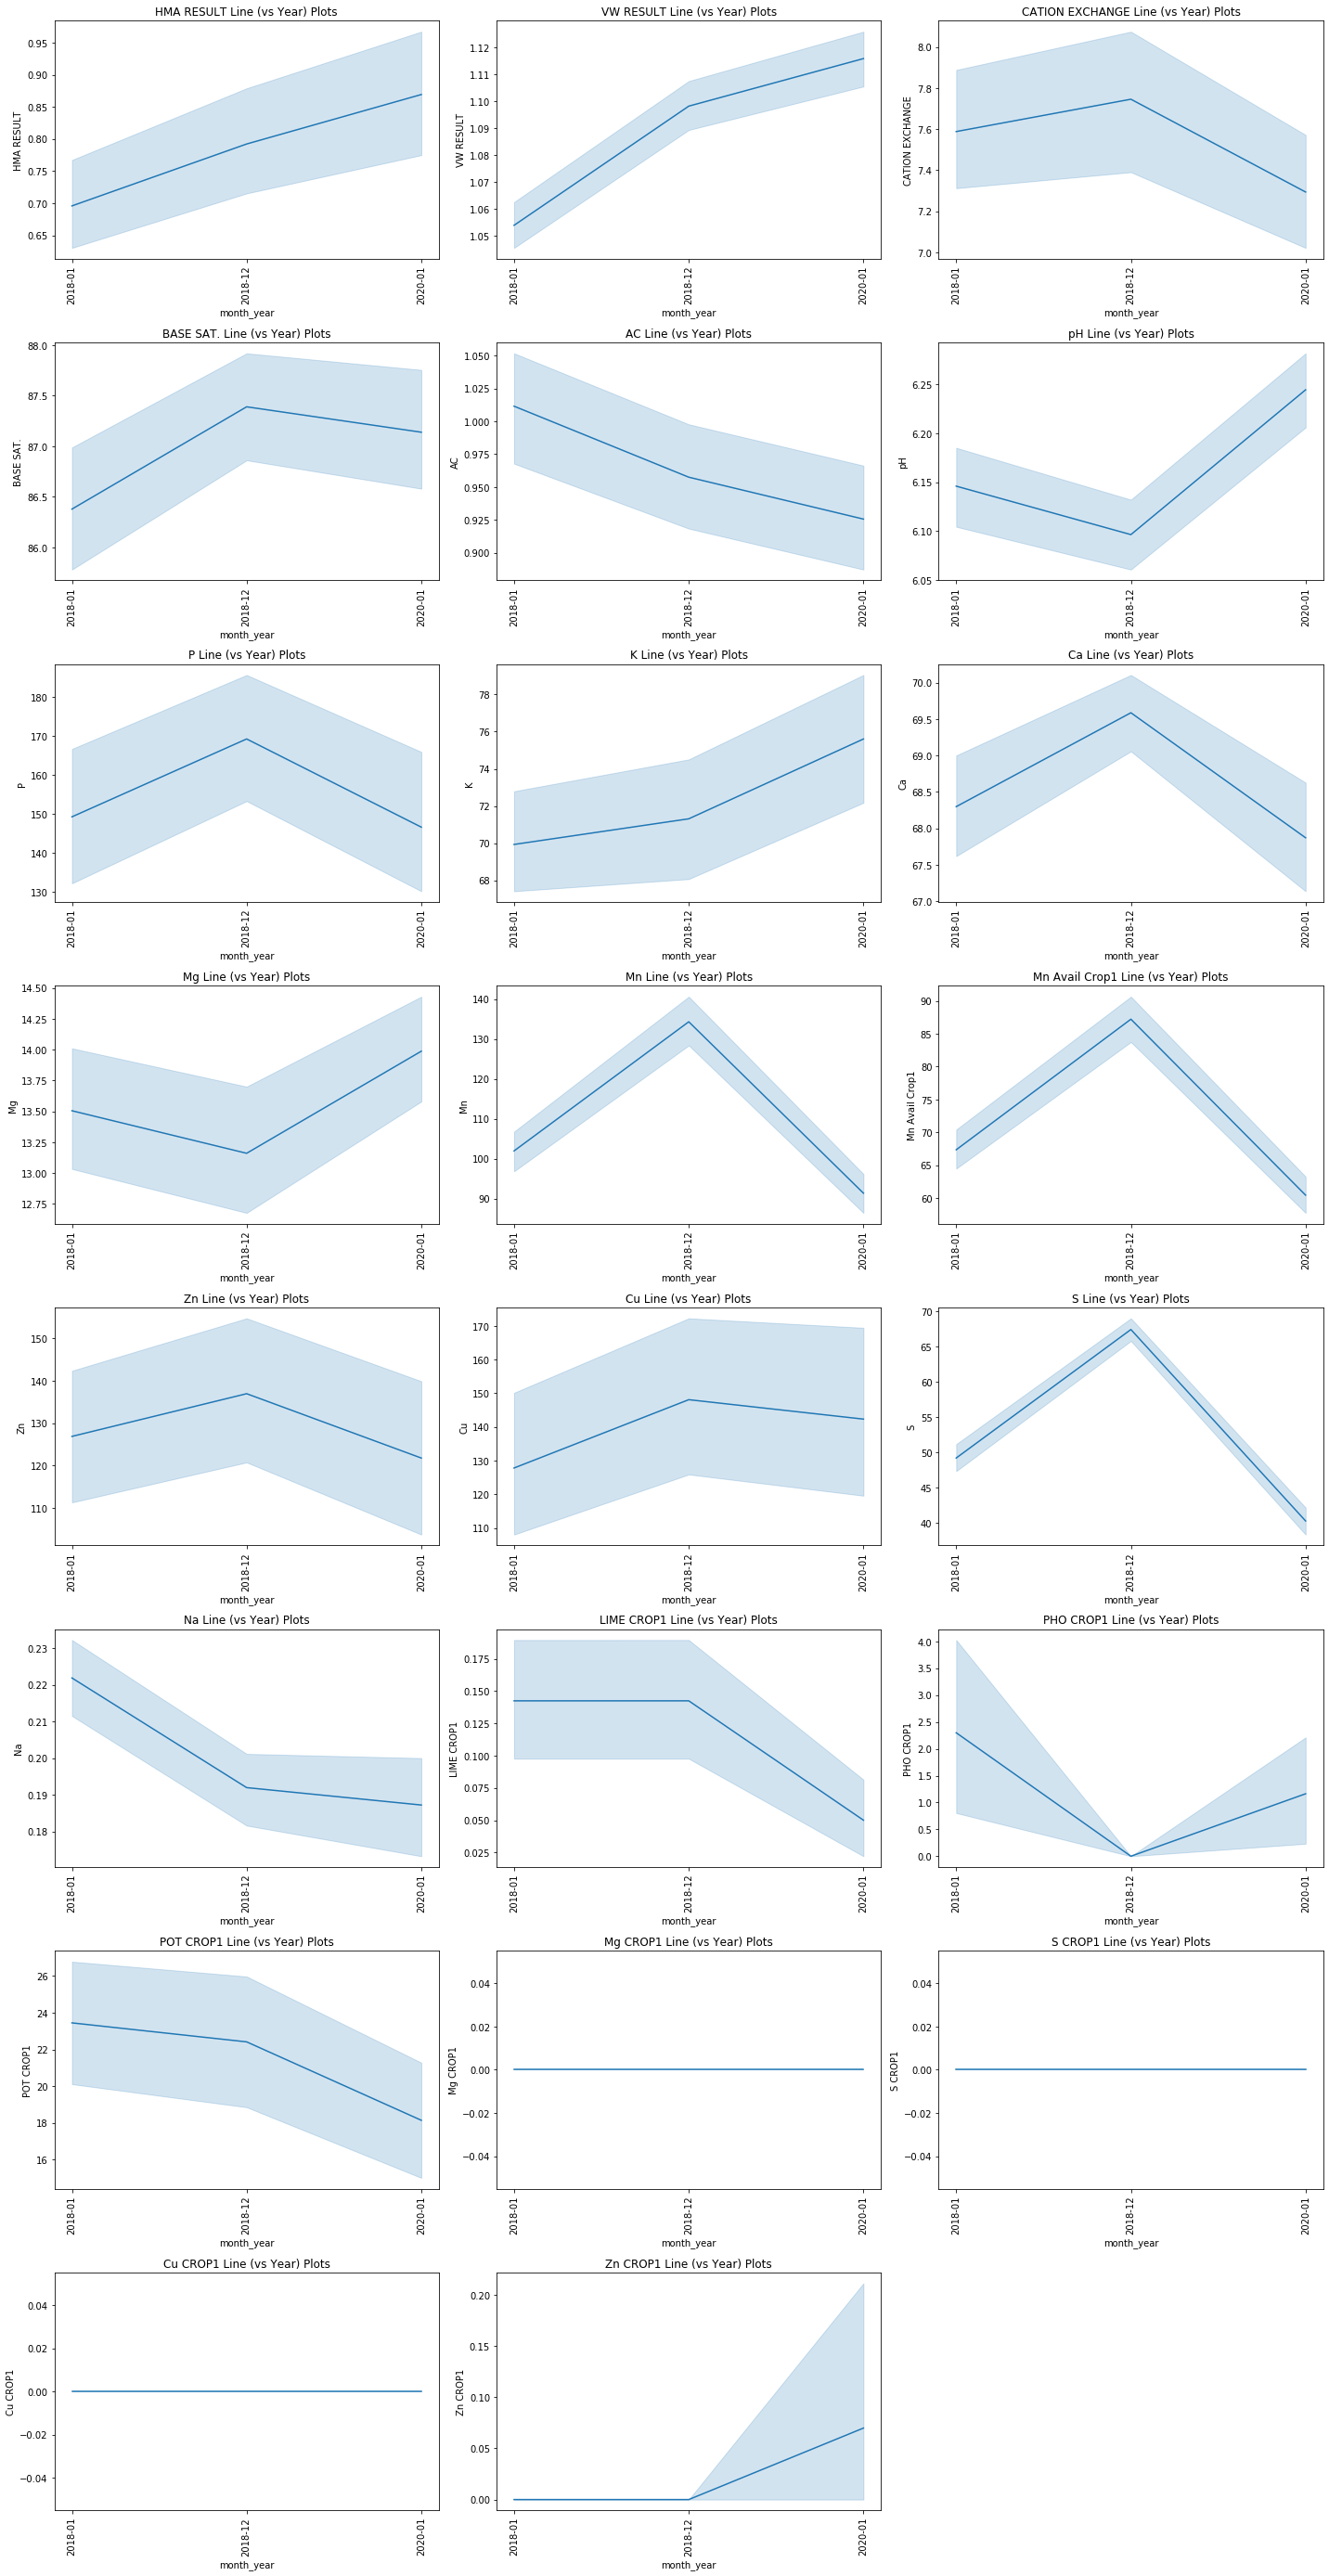

In [38]:
#Visually inspecting variables by year
def var_year_visual(data):
    plt.figure(figsize=(20, 110))
    i = 0
    for col in cont_var:
        i += 1
        plt.subplot(len(cont_var), 3, i)
        plt.title('{} Line (vs Year) Plots'.format(col))
        sns.lineplot(data['month_year'].astype(str), data[col], palette='Set1')
        plt.xticks(rotation=90)
    plt.tight_layout()    
    plt.show()
    
var_year_visual(farm_A_df)

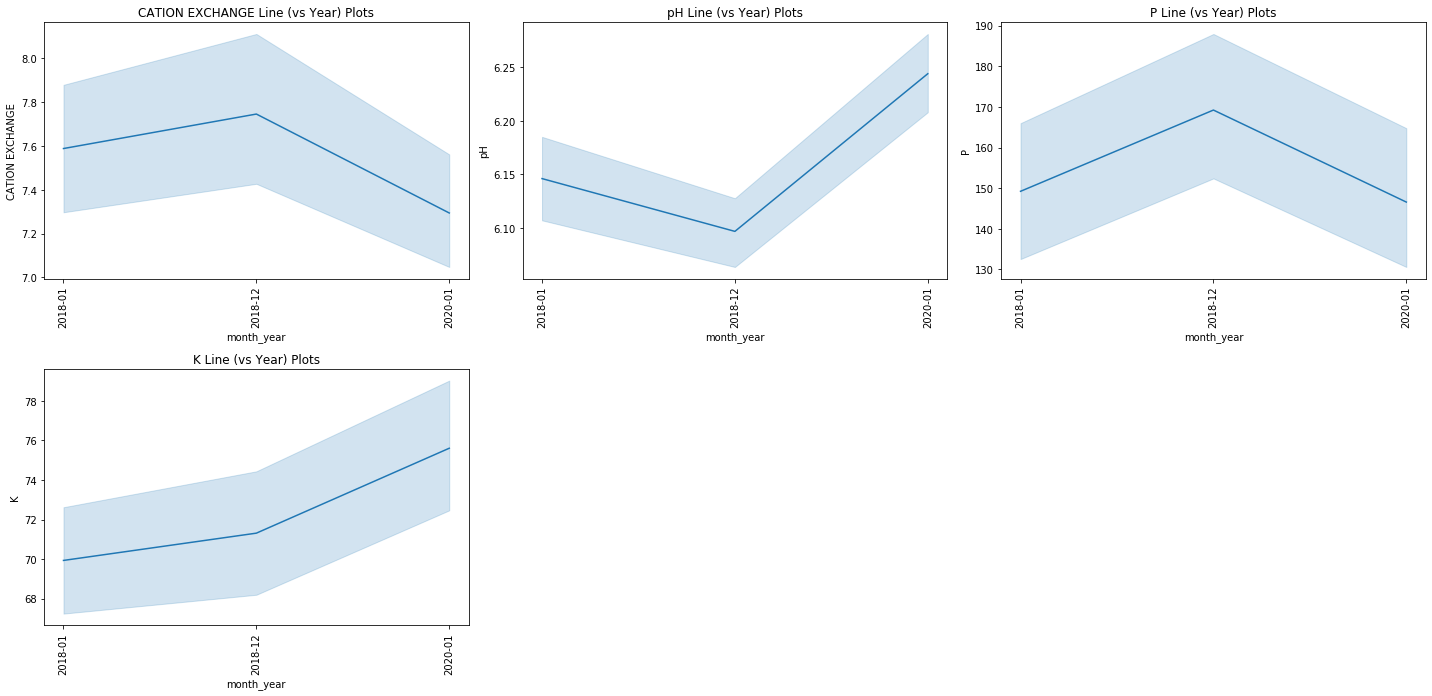

In [39]:
#Visually inspecting variables by year
def var_year_visual(data):
    plt.figure(figsize=(20, 110))
    i = 0
    for col in cont_var_interest:
        i += 1
        plt.subplot(len(cont_var), 3, i)
        plt.title('{} Line (vs Year) Plots'.format(col))
        sns.lineplot(data['month_year'].astype(str), data[col], palette='Set1')
        plt.xticks(rotation=90)
    plt.tight_layout()    
    plt.show()
    
var_year_visual(farm_A_df)

In [40]:
#empty variables
col_to_drop=['Mg CROP1','S CROP1','Cu CROP1']

#dropping null variables
for col in col_to_drop:
    farm_A_df.drop(col, axis = 1, inplace=True)

In [41]:
# removing lime month, lime year and lime in tones as those variables only have 0 as values
cont_var_A = ['HMA RESULT','VW RESULT','CATION EXCHANGE','BASE SAT.','AC','pH',
 'P',
 'K',
 'Ca',
 'Mg',
 'Mn',
 'Mn Avail Crop1',
 'Zn',
 #'Zn Avail', duplicate column remove
 'Cu',
 'S',
 'Na',
 'LIME CROP1',
 'PHO CROP1',
 'POT CROP1',
 #'Mg CROP1',
 #'S CROP1',
 #'Cu CROP1',
 'Zn CROP1',
 #'B CROP1', hashing out because only one value
 #'Note CROP1'
           ]

In [42]:
len(cont_var_A)

20

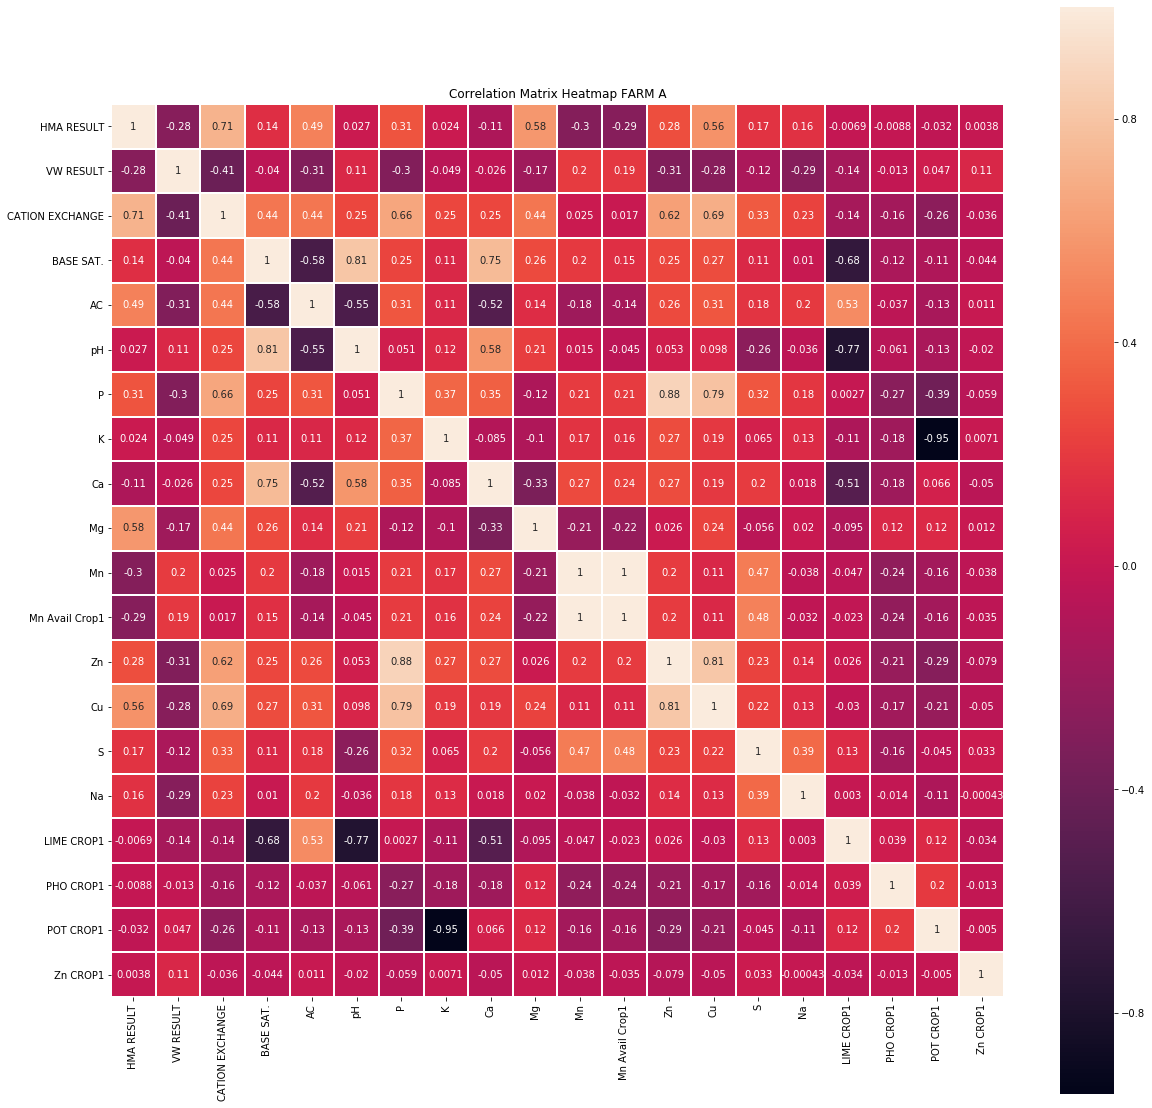

In [43]:
#Evaluating overall correlation
plt.figure(figsize=(20,20))
sns.heatmap(farm_A_df[cont_var_A].corr(), square=True, annot=True, linewidths=1)
plt.ylim(20, 0)
plt.title('Correlation Matrix Heatmap FARM A')
plt.show()

## Farm A anaysis by year

In [44]:
df2.head()

,Field Name:,Year,Month,Date,Count,pH,Ac (meq/100g),CEC (meq/100g),P,K,S,Zn,Mn,Cu (%),Mg%,Ca%
0,A,"2,017.00",Feb,Feb 2017,87.00,6.20,1.31,8.17,158.00,79.00,47.00,143.00,100.00,142.00,12.80,65.70
1,A,"2,015.00",Oct,Oct 2015,87.00,6.20,0.99,7.66,183.00,93.00,35.00,147.00,95.00,158.00,13.50,67.10
2,A,"2,014.00",Dec,Dec 2014,87.00,6.20,1.13,8.03,163.00,86.00,33.00,142.00,80.00,137.00,13.60,66.60
3,A,"2,014.00",Feb,Feb 2014,87.00,6.30,0.75,8.07,186.00,115.00,39.00,157.00,77.00,141.00,14.40,68.80
4,A,"2,012.00",Oct,Oct 2012,87.00,6.30,0.91,7.81,181.00,98.00,47.00,153.00,73.00,138.00,13.80,67.60


In [45]:
farm_A_df_2=df2.iloc[(df2['Field Name:'] == 'A').values]

In [46]:
farm_A_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
Field Name:       7 non-null object
Year              7 non-null float64
Month             7 non-null object
Date              7 non-null object
Count             7 non-null float64
pH                7 non-null float64
Ac (meq/100g)     7 non-null float64
CEC (meq/100g)    7 non-null float64
P                 7 non-null float64
K                 7 non-null float64
S                 7 non-null float64
Zn                7 non-null float64
Mn                7 non-null float64
Cu (%)            7 non-null float64
Mg%               7 non-null float64
Ca%               7 non-null float64
dtypes: float64(13), object(3)
memory usage: 952.0+ bytes


In [47]:
farm_A_df_2.head()

,Field Name:,Year,Month,Date,Count,pH,Ac (meq/100g),CEC (meq/100g),P,K,S,Zn,Mn,Cu (%),Mg%,Ca%
0,A,"2,017.00",Feb,Feb 2017,87.00,6.20,1.31,8.17,158.00,79.00,47.00,143.00,100.00,142.00,12.80,65.70
1,A,"2,015.00",Oct,Oct 2015,87.00,6.20,0.99,7.66,183.00,93.00,35.00,147.00,95.00,158.00,13.50,67.10
2,A,"2,014.00",Dec,Dec 2014,87.00,6.20,1.13,8.03,163.00,86.00,33.00,142.00,80.00,137.00,13.60,66.60
3,A,"2,014.00",Feb,Feb 2014,87.00,6.30,0.75,8.07,186.00,115.00,39.00,157.00,77.00,141.00,14.40,68.80
4,A,"2,012.00",Oct,Oct 2012,87.00,6.30,0.91,7.81,181.00,98.00,47.00,153.00,73.00,138.00,13.80,67.60


In [48]:
#adding a new column that is month/year based on the complete Date
import datetime
farm_A_df_2['month_year'] = pd.to_datetime(farm_A_df_2['Date']).dt.to_period('M')
farm_A_df_2.head()


,Field Name:,Year,Month,Date,Count,pH,Ac (meq/100g),CEC (meq/100g),P,K,S,Zn,Mn,Cu (%),Mg%,Ca%,month_year
0,A,"2,017.00",Feb,Feb 2017,87.00,6.20,1.31,8.17,158.00,79.00,47.00,143.00,100.00,142.00,12.80,65.70,2017-02
1,A,"2,015.00",Oct,Oct 2015,87.00,6.20,0.99,7.66,183.00,93.00,35.00,147.00,95.00,158.00,13.50,67.10,2015-10
2,A,"2,014.00",Dec,Dec 2014,87.00,6.20,1.13,8.03,163.00,86.00,33.00,142.00,80.00,137.00,13.60,66.60,2014-12
3,A,"2,014.00",Feb,Feb 2014,87.00,6.30,0.75,8.07,186.00,115.00,39.00,157.00,77.00,141.00,14.40,68.80,2014-02
4,A,"2,012.00",Oct,Oct 2012,87.00,6.30,0.91,7.81,181.00,98.00,47.00,153.00,73.00,138.00,13.80,67.60,2012-10


In [49]:
cont_var_df2=[#'Field Name:',
 #'Year',
 #'Month',
 #'Date',
 #'Count',
 'pH',
 'Ac (meq/100g)',
 'CEC (meq/100g)',
 'P',
 'K',
 'S',
 'Zn',
 'Mn',
 'Cu (%)',
 'Mg%',
 'Ca%']

In [50]:
cont_var_interest_df2=[  'CEC (meq/100g)','pH',
 'P',
 'K',]

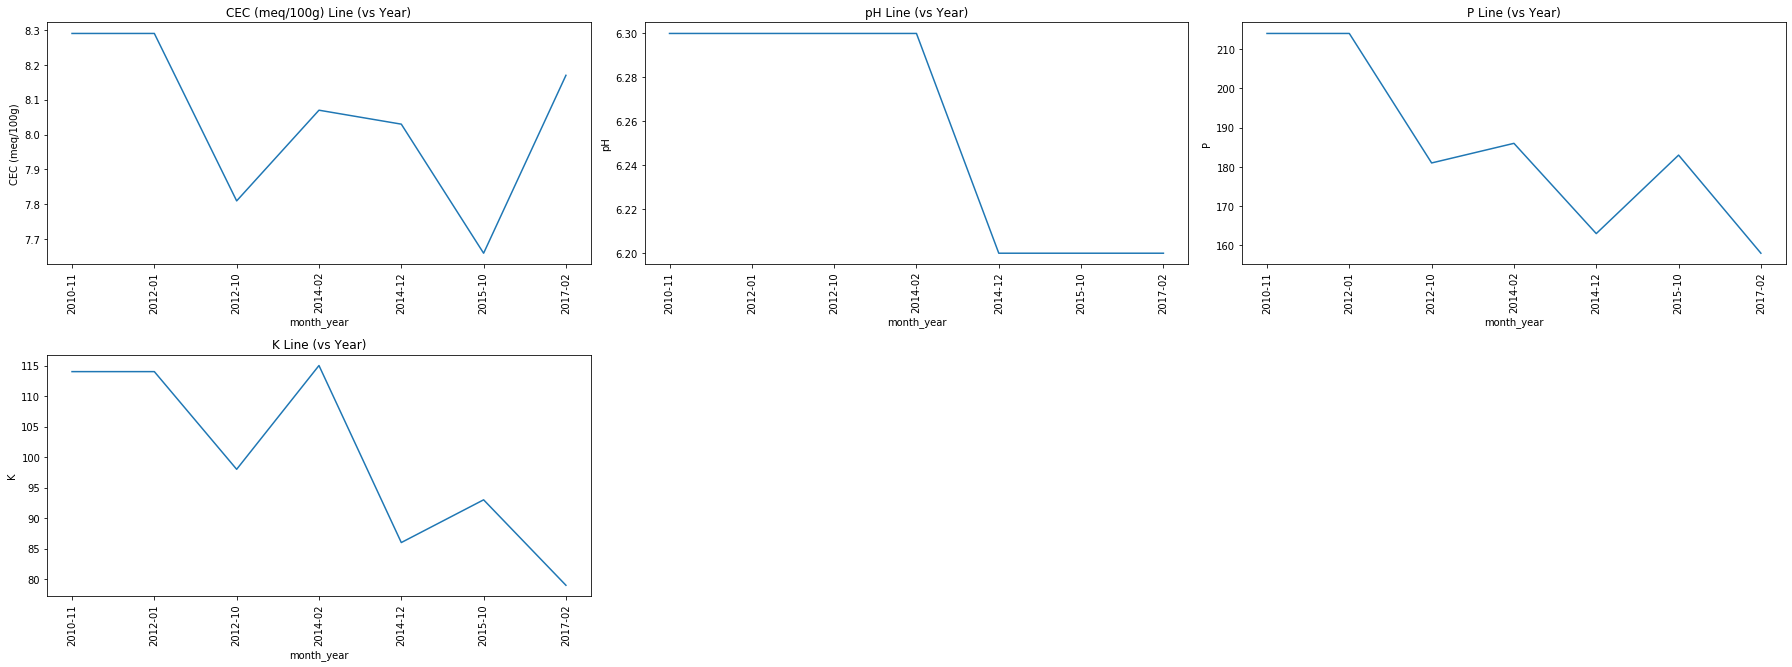

In [51]:
#Visually inspecting variables by year
def var_year_visual(data):
    plt.figure(figsize=(25,50))
    i = 0
    for col in cont_var_interest_df2:
        i += 1
        plt.subplot(len(cont_var_df2), 3, i)
        plt.title('{} Line (vs Year)'.format(col))
        sns.lineplot(data['month_year'].astype(str), data[col], palette='Set1')
        plt.xticks(rotation=90)
    plt.tight_layout()    
    plt.show()
    
var_year_visual(farm_A_df_2)

Resource for larger soil data set:
https://www.kaggle.com/karandas/unsupervised-learning-of-soil-data
